## COMPARE RED WINE AND WHITE WINE

<b>Data Set Information:</b>

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

<b>In this analysis, I'm going to figure out the difference between red wine and white wine in ingredients.</b><br>
<u>Here is the work flow:</u>
* Read data from 2 datasets, check duplicated values and missing values.
* Compare 2 wines by measurement of features in physicochemical tests.
* Check correlation between test features and quality.

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import missingno as msno
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.style.use('ggplot')

### Red wine

In [2]:
#red wine data
red_df = pd.read_csv('winequality-red.csv', delimiter=';')
print(red_df.shape)
red_df.sample(5)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
115,9.4,0.40,0.31,2.2,0.090,13.0,62.0,0.99660,3.07,0.63,10.5,6
127,8.1,1.33,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
572,10.2,0.24,0.49,2.4,0.075,10.0,28.0,0.99780,3.14,0.61,10.4,5
1066,6.6,0.52,0.08,2.4,0.070,13.0,26.0,0.99358,3.40,0.72,12.5,7
293,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,6


In [3]:
#check number of duplicated rows
red_df.duplicated().sum()

240

In [4]:
#drop duplicated rows
red_df.drop_duplicates(inplace=True)
#data shape after dropping duplicates
red_df.shape

(1359, 12)

In [5]:
#percentage of missing values
red_df.isnull().mean()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [6]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
red_df['is_red'] = 1
red_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
462,11.0,0.260,0.68,2.55,0.085,10.0,25.0,0.99700,3.18,0.61,11.8,5,1
905,9.2,0.580,0.20,3.00,0.081,15.0,115.0,0.99800,3.23,0.59,9.5,5,1
349,9.1,0.785,0.00,2.60,0.093,11.0,28.0,0.99940,3.36,0.86,9.4,6,1
641,9.5,0.590,0.44,2.30,0.071,21.0,68.0,0.99920,3.46,0.63,9.5,5,1
1470,10.0,0.690,0.11,1.40,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,5,1


### White wine

In [8]:
white_df = pd.read_csv('winequality-white.csv', delimiter=';')
print(white_df.shape)
white_df.sample(5)

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2929,6.6,0.220,0.29,14.40,0.046,39.0,118.0,0.99834,3.05,0.50,9.1,6
3372,5.6,0.150,0.26,5.55,0.051,51.0,139.0,0.99336,3.47,0.50,11.0,6
3429,7.1,0.180,0.39,14.50,0.051,48.0,156.0,0.99947,3.35,0.78,9.1,5
3727,5.7,0.265,0.28,6.90,0.036,46.0,150.0,0.99299,3.36,0.44,10.8,7
4625,8.3,0.490,0.23,6.65,0.034,6.0,158.0,0.99344,3.05,0.48,11.2,5


In [9]:
#check number of duplicated rows
white_df.duplicated().sum()

937

In [10]:
#drop duplicated rows
white_df.drop_duplicates(inplace=True)
#shape of data after dropping duplicated rows
white_df.shape

(3961, 12)

In [11]:
#percentage of missing values
white_df.isnull().mean()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [12]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [13]:
white_df['is_red'] = 0

### Concatenate red and white df

In [14]:
columns = red_df.columns
white_df = white_df[columns] #reason for this step is to make sure red_df and white_df's columns are in same order before concatenating

In [15]:
wine_df = pd.concat([red_df, white_df], ignore_index=True)
wine_df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
2912,7.4,0.44,0.20,11.5,0.049,44.0,157.0,0.99800,3.27,0.44,9.0,5,0
2955,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,0
1297,7.1,0.69,0.08,2.1,0.063,42.0,52.0,0.99608,3.42,0.60,10.2,6,1
844,7.1,0.34,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4,5,1
2792,6.3,0.26,0.29,2.2,0.043,35.0,175.0,0.99180,3.38,0.43,11.6,6,0


### Compare red and white wine

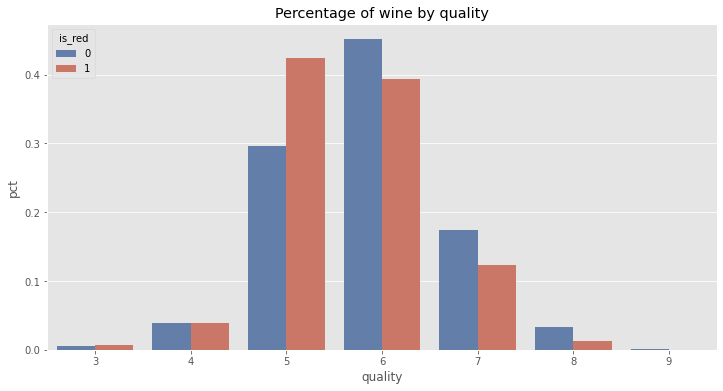

In [16]:
#count quality by percentage of number of wine (I don't compare by number as the number of red wine and white wine are different)
count_quality = wine_df.groupby(['is_red', 'quality'])['alcohol'].count().rename("count")
pct_quality = (count_quality / count_quality.groupby(level=0).sum()).rename('pct')
pct_quality = pd.DataFrame(pct_quality).reset_index()

palette ={0:"#577bb5",1:"#db6c58"}
plt.figure(figsize=(12,6))
sns.barplot(x='quality', y='pct', data=pct_quality, hue='is_red', palette = palette)\
        .set_title('Percentage of wine by quality')
plt.show()

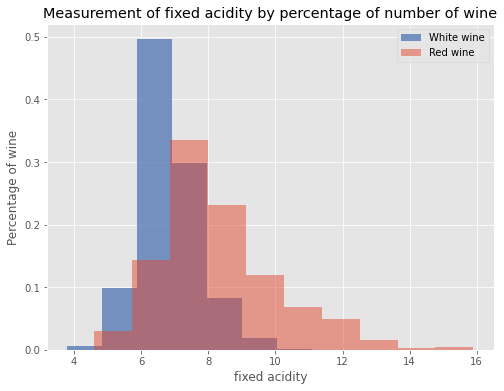

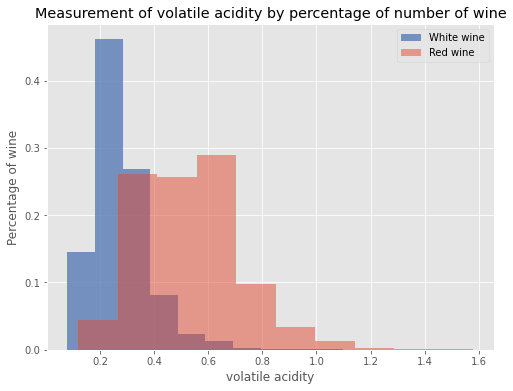

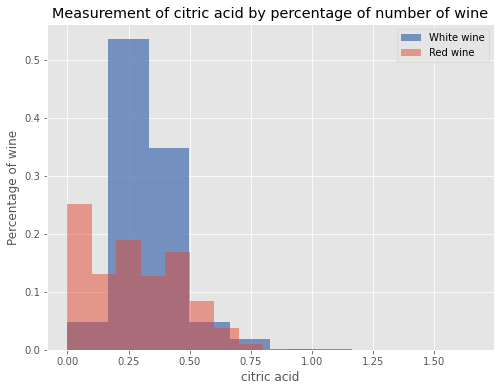

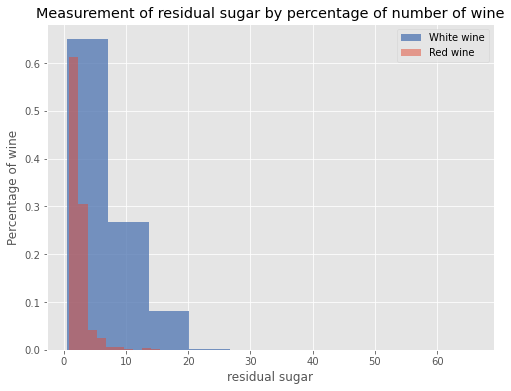

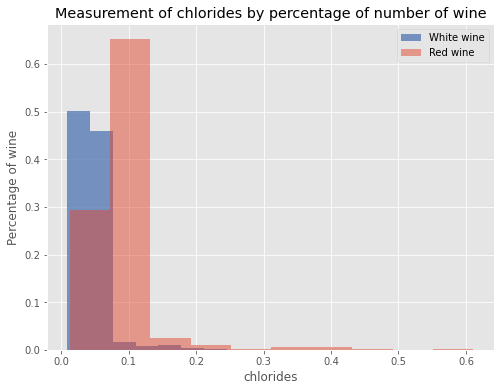

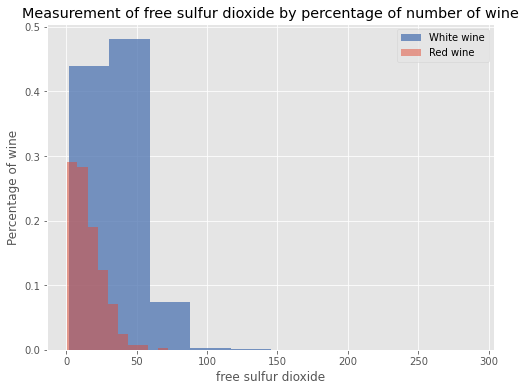

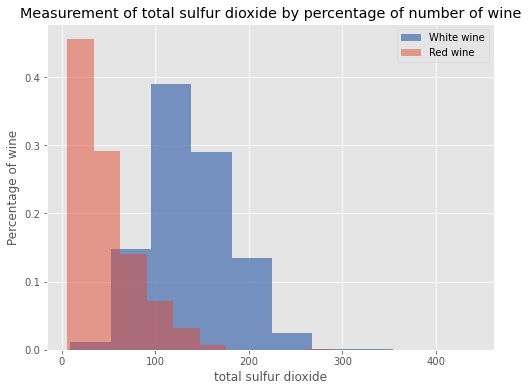

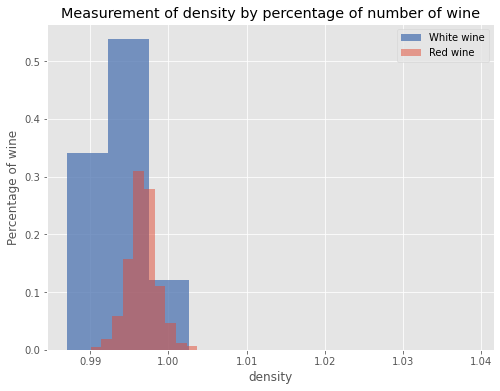

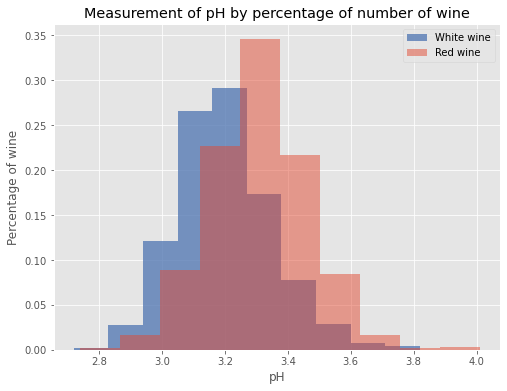

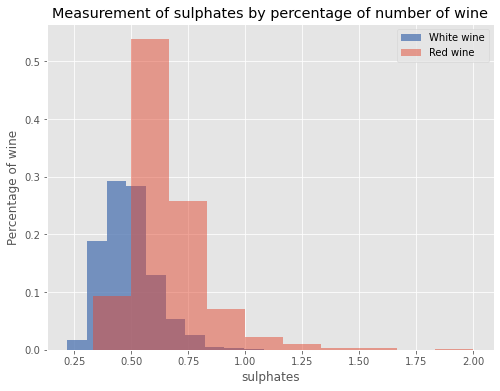

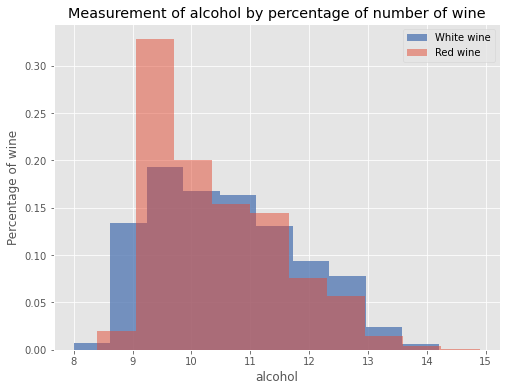

In [17]:
#visulization measurements of test features by percentage of number of wine
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for col in columns:
    plt.figure(figsize=(8,6))
    white_df = wine_df[wine_df['is_red']==0]
    red_df = wine_df[wine_df['is_red']==1]

    plt.hist(white_df[col], weights=np.ones(len(white_df[col]))/len(white_df[col]), alpha=0.8, color='#577bb5', label='White wine')
    plt.hist(red_df[col], weights=np.ones(len(red_df[col]))/len(red_df[col]), alpha=0.5, label='Red wine')
    plt.title(f'Measurement of {col} by percentage of number of wine')
    plt.xlabel(col)
    plt.ylabel('Percentage of wine')
    plt.legend()
    plt.show()

### Correlations between test features and quality

In [18]:
red_corr = red_df.corr()['quality'].sort_values(ascending=False)
white_corr = white_df.corr()['quality'].sort_values(ascending=False)
#filter not to get data from column 'quality' and 'is_red'
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
red_corr = red_corr.filter(items=columns, axis=0)
white_corr = white_corr.filter(items=columns, axis=0)

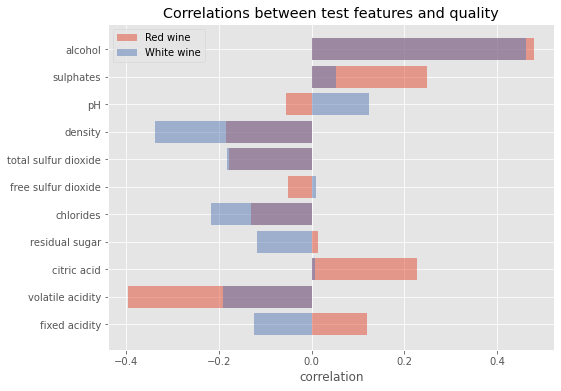

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(red_corr.index, red_corr.values, alpha=0.5, label='Red wine')
ax.barh(white_corr.index, white_corr.values, alpha=0.5, color='#577bb5', label='White wine')
plt.title('Correlations between test features and quality')
plt.xlabel('correlation')
plt.legend()
plt.show()